In [1]:
import openai
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


env = gym.make("FrozenLake-v1")

In [2]:
action_size = env.action_space.n
state_size = env.observation_space.n

action_size, state_size

(4, 16)

q table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


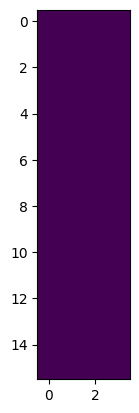

In [3]:
qtable = np.zeros((state_size, action_size))
print("q table")
print(qtable)
plt.imshow(qtable)
plt.show()

In [4]:
# hyper params
total_episodes = 15000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
max_epsilon = 1.0               # Exploration probability at start
min_epsilon = 0.01               # Minimum exploration probability 
epsilon = 1.0         # Exploration rate
revisit_penalty = -0

decay_rate = 5e-3            # Exponential decay rate for exploration prob

cum_reward=0.000000%
cum_reward=30.946667%
Score over time:  0.482
q table
[[3.94594188e-01 8.35231816e-02 7.73385631e-02 7.57254679e-02]
 [1.13647558e-02 1.83166329e-03 6.65581809e-03 3.97488796e-01]
 [1.29611662e-02 1.70155953e-02 1.95501485e-01 1.60795195e-02]
 [3.38981665e-03 3.57855143e-04 7.78162461e-03 4.53557562e-02]
 [4.91628093e-01 8.51647846e-02 1.04661129e-01 8.60147136e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.45947049e-02 2.30890840e-15 2.02855901e-03 1.04223123e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.06059854e-02 1.96908246e-02 6.30094018e-02 7.05058456e-01]
 [4.94115919e-02 4.00827979e-01 2.14285537e-02 2.75838815e-02]
 [7.30276251e-01 8.49418306e-03 5.15247141e-04 1.04906181e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.02517301e-04 9.39950693e-02 6.99854357e-01 1.07221673e-01]
 [1.91855000e-01 9.73959561e-01 1.55392021e

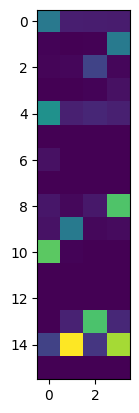

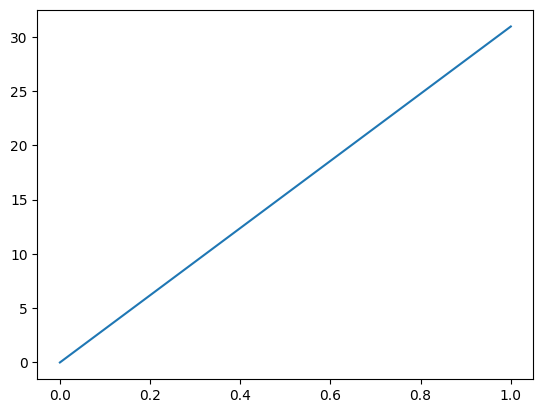

In [5]:
import random
# List of rewards
rewards = np.zeros(total_episodes)
cum_rewards = []

for episode in range(total_episodes):
    # Reset the environment
    state, info = env.reset()
    step = 0
    done = False
    total_rewards = 0
    visited_states = set()


    for step in range(max_steps):
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If number > epsilon - exploitation (taking the highest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        # Else exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        observation, reward, terminated, truncated, info = env.step(action)
        # Apply penalty if revisiting a state
        if state in visited_states:
            reward += revisit_penalty
        else:
            visited_states.add(state)
        reward = np.clip(reward, -1, 1)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[observation,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[observation, :]) - qtable[state, action])

        total_rewards += reward
        
        # Our new state is state
        state = observation

        # If done (if we're dead) : finish episode
        if terminated or truncated:
            break
    if episode % 10000 == 0:
        cum_reward = rewards.sum()/total_episodes*100
        cum_rewards.append(cum_reward)
        print(f"{cum_reward=:2f}%")

    rewards[episode] = total_rewards
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) # why decay geometrically!!why not = max(min_epsilon, epsilon - decay_rate)



print ("Score over time: ", sum(rewards)/total_episodes)
print("q table")
print(qtable)
plt.imshow(qtable)
plt.show()
plt.plot(cum_rewards)
plt.show()

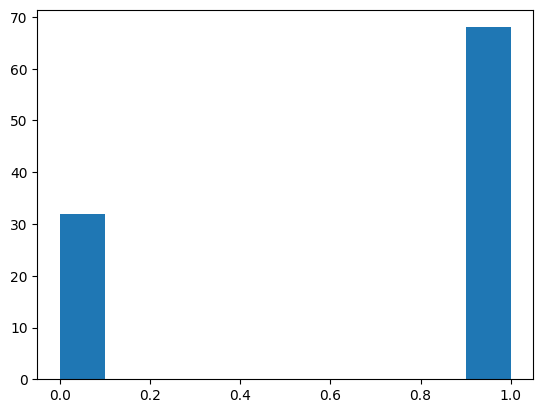

In [6]:
unique_elements, counts = np.unique(rewards[-100:], return_counts=True)

# Print the result
# for element, count in zip(unique_elements, counts):
#     print(f"{element} -> {count} times, {count/10:.2f}%")

plt.hist(rewards[-100:])
plt.show()

In [7]:
env = gym.make("FrozenLake-v1", render_mode="human")
env.reset()
for episode in range(5):
    state, info = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(99):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        observation, reward, terminated, truncated, info = env.step(action)
        
        if terminated or truncated:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            if terminated:
                # We print the number of step it took.
                print("Number of steps", step)
            break
        state = observation
env.close()

****************************************************
EPISODE  0
Number of steps 23
****************************************************
EPISODE  1
Number of steps 20
****************************************************
EPISODE  2
Number of steps 21
****************************************************
EPISODE  3
Number of steps 19
****************************************************
EPISODE  4
Number of steps 43


In [ ]:
# qtable = np.zeros((state_size, action_size))
# print("q table")
# print(qtable)
# plt.imshow(qtable)
# plt.show()

In [8]:
# hyper params
total_episodes = 15000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 49                # Max steps per episode
gamma = 0.15                  # Discounting rate

# Exploration parameters
max_epsilon = 1.0               # Exploration probability at start
min_epsilon = 0               # Minimum exploration probability 
epsilon = 1.0         # Exploration rate

decay_rate = 1e-3             # Exponential decay rate for exploration prob
# Set revisit penalty and reward clipping limits
revisit_penalty = -0.01

In [ ]:
import random
# List of rewards
rewards = np.zeros(total_episodes)
cum_rewards = []
for episode in range(total_episodes):
    # Reset the environment
    state, info = env.reset()
    step = 0
    done = False
    total_rewards = 0


    for step in range(max_steps):
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If number > epsilon - exploitation (taking the highest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        # Else exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        observation, reward, terminated, truncated, info = env.step(action)
        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[observation,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[observation, :]) - qtable[state, action])

        total_rewards += reward
        
        # Our new state is state
        state = observation

        # If done (if we're dead) : finish episode
        if terminated or truncated:
            break
    if episode % 1000 == 0:
        cum_reward = rewards.sum()/total_episodes*100
        cum_rewards.append(cum_reward)
        print(f"{cum_reward=:2f}%")

    rewards[episode] = total_rewards
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) # why decay geometrically!!why not = max(min_epsilon, epsilon - decay_rate)



print ("Score over time: " +  str(sum(rewards)/total_episodes))
print("q table")
print(qtable)
plt.imshow(qtable)
plt.show()
plt.plot(cum_rewards)
plt.show()

In [ ]:
unique_elements, counts = np.unique(rewards[-1000:], return_counts=True)

# Print the result
for element, count in zip(unique_elements, counts):
    print(f"{element} -> {count} times, {count/10:.2f}%")

plt.hist(rewards)
plt.show()

In [ ]:
env = gym.make("FrozenLake-v1", render_mode="human")
env.reset()
for episode in range(5):
    state, info = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(99):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        observation, reward, terminated, truncated, info = env.step(action)
        
        if terminated or truncated:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            if terminated:
                # We print the number of step it took.
                print("Number of steps", step)
            break
        state = observation
env.close()